In [ ]:
# Load Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Mount Google Drive (if dataset is in Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Define dataset path (update this to match your Drive or local path)
dataset_path = '/content/drive/MyDrive/content/brain_tumor/BRAIN TUMOR'

# Classes
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = []
Y = []
for cls in classes:
    cls_path = os.path.join(dataset_path, 'Training', cls)
    for img_name in os.listdir(cls_path):
        img = cv2.imread(os.path.join(cls_path, img_name), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

X = np.array(X)
Y = np.array(Y)

# Visualize Class Distribution
print(pd.Series(Y).value_counts())

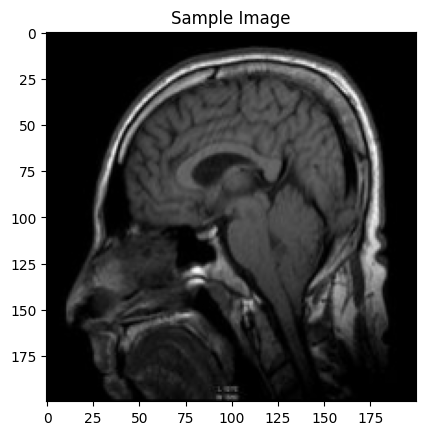

In [ ]:
# Visualize Data
plt.imshow(X[0], cmap='gray')
plt.title("Sample Image")
plt.show()

# Prepare Data for Training
X_updated = X.reshape(len(X), -1)  # Flatten images
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, test_size=0.20, random_state=10)

# Feature Scaling
xtrain = xtrain / 255
xtest = xtest / 255

# (Optional) PCA for Dimensionality Reduction
# Uncomment the PCA lines if required
# pca = PCA(0.98)  # Retain 98% variance
# xtrain = pca.fit_transform(xtrain)
# xtest = pca.transform(xtest)

# Train Logistic Regression Model
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

# Train SVM Model
sv = SVC()
sv.fit(xtrain, ytrain)

In [ ]:
# Evaluation
print("Logistic Regression Training Score:", lg.score(xtrain, ytrain))
print("Logistic Regression Testing Score:", lg.score(xtest, ytest))
print("SVM Training Score:", sv.score(xtrain, ytrain))
print("SVM Testing Score:", sv.score(xtest, ytest))

# Predictions
pred = sv.predict(xtest)
print("Misclassified Indices:", np.where(ytest != pred))

# Test Model Visualization
dec = {0: 'No Tumor', 1: 'Positive Tumor'}

Logistic Regression Training Score: 1.0
Logistic Regression Testing Score: 0.967741935483871
SVM Training Score: 0.9909182643794148
SVM Testing Score: 0.9758064516129032
Misclassified Indices: (array([ 42,  94, 110, 121, 224, 232]),)


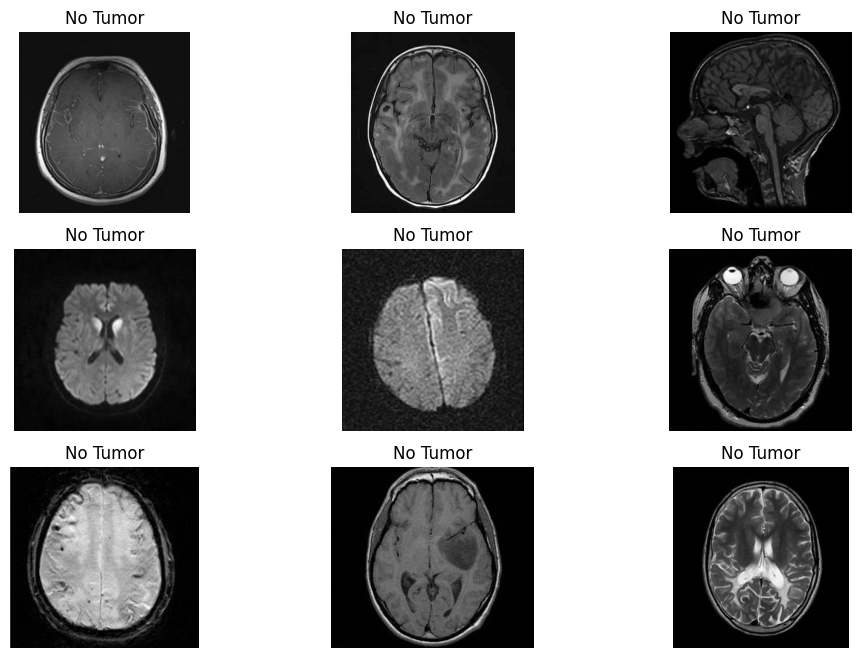

In [ ]:
# Visualize Results for No Tumor Images
plt.figure(figsize=(12, 8))
no_tumor_test_path = os.path.join(dataset_path, 'Testing', 'no_tumor')
c = 1
for img_name in os.listdir(no_tumor_test_path)[:9]:
    plt.subplot(3, 3, c)
    img = cv2.imread(os.path.join(no_tumor_test_path, img_name), 0)
    img1 = cv2.resize(img, (200, 200)).reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1
plt.show()

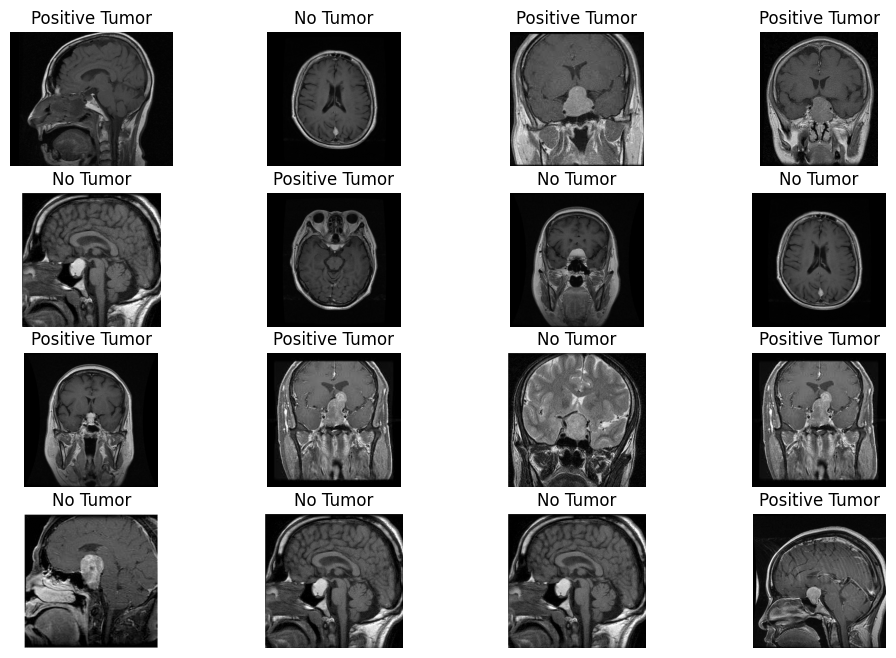

In [ ]:
# Visualize Results for Pituitary Tumor Images
plt.figure(figsize=(12, 8))
pituitary_tumor_test_path = os.path.join(dataset_path, 'Testing', 'pituitary_tumor')
c = 1
for img_name in os.listdir(pituitary_tumor_test_path)[:16]:
    plt.subplot(4, 4, c)
    img = cv2.imread(os.path.join(pituitary_tumor_test_path, img_name), 0)
    img1 = cv2.resize(img, (200, 200)).reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1
plt.show()

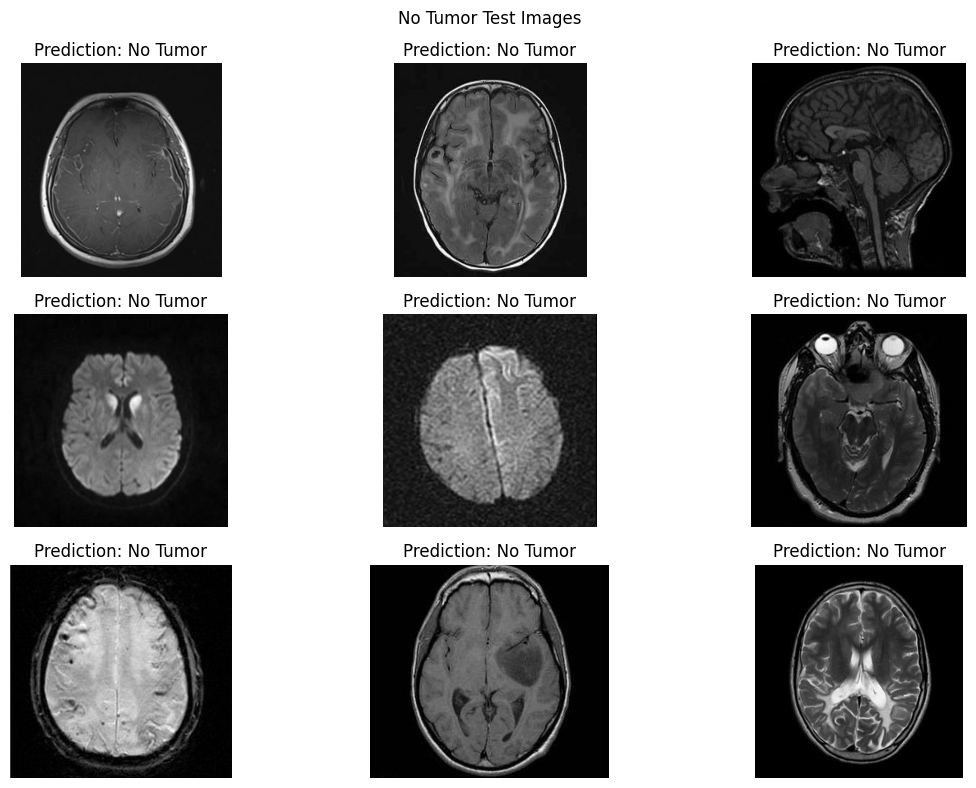

In [ ]:
# Visualize Results for No Tumor Images
plt.figure(figsize=(12, 8))
no_tumor_test_path = os.path.join(dataset_path, 'Testing', 'no_tumor')
c = 1
for img_name in os.listdir(no_tumor_test_path)[:9]:
    plt.subplot(3, 3, c)
    img = cv2.imread(os.path.join(no_tumor_test_path, img_name), 0)
    img1 = cv2.resize(img, (200, 200)).reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(f"Prediction: {dec[p[0]]}")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1
plt.suptitle("No Tumor Test Images")
plt.tight_layout()
plt.show()

In [ ]:

tumor_types = ['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']

for tumor_type in tumor_types:
    tumor_test_path = os.path.join(dataset_path, 'Testing', tumor_type)
    c = 1
    plt.figure(figsize=(12, 8))
    print(f"Visualizing results for {tumor_type.replace('_', ' ').title()}")

    for img_name in os.listdir(tumor_test_path)[:9]:
        plt.subplot(3, 3, c)

        # Read the image in grayscale mode
        img = cv2.imread(os.path.join(tumor_test_path, img_name), 0)

        # Resize the image to 200x200 pixels (you can adjust the size as needed)
        img_resized = cv2.resize(img, (200, 200))

        # Normalize the image and reshape it
        img1 = img_resized.reshape(1, -1) / 255

        # Prediction (optional if you need to include it later)
        p = sv.predict(img1)

        # Display the image in grayscale without the prediction title
        plt.imshow(img_resized, cmap='gray')

        # Remove the axis for better visualization
        plt.axis('off')

        # Increment the counter for subplot placement
        c += 1

    # Set the overall title for the figure
    plt.suptitle(f"Test Images - {tumor_type.replace('_', ' ').title()}")

    # Adjust layout to ensure images are neatly displayed
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent title from overlapping with images

    # Show the figure
    plt.show()


NameError: name 'os' is not defined